In [1]:
import cv2
import os
import sys
import numpy as np
import skimage
from skimage import io
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from helper import *


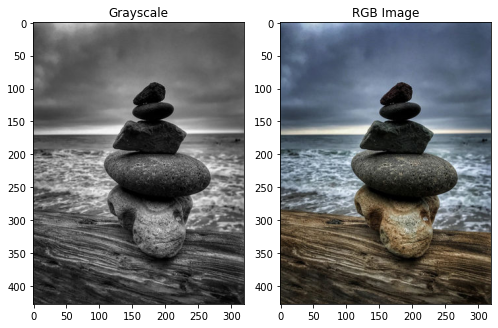

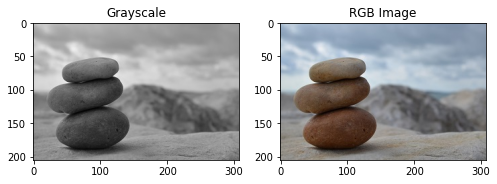

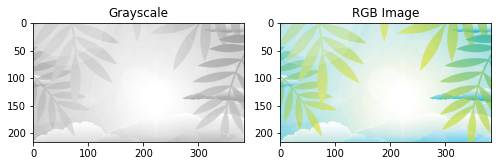

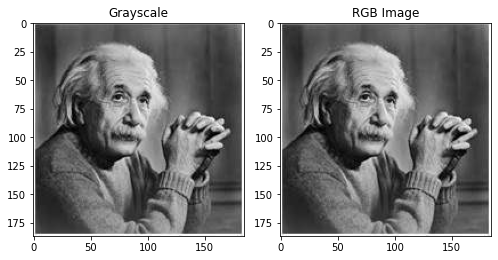

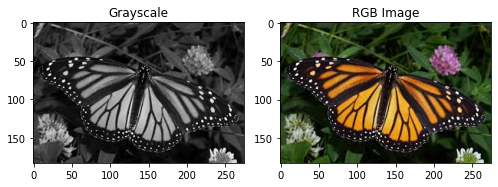

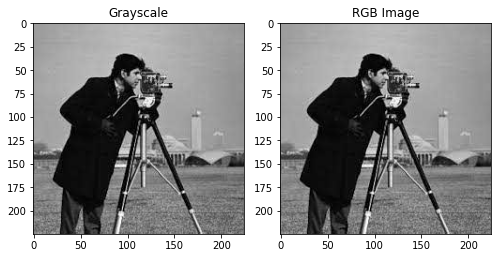

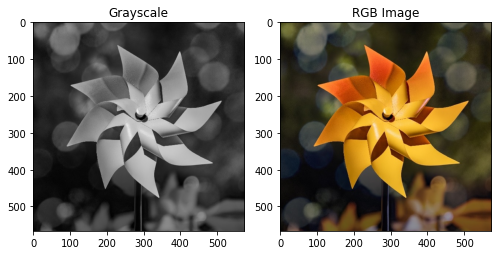

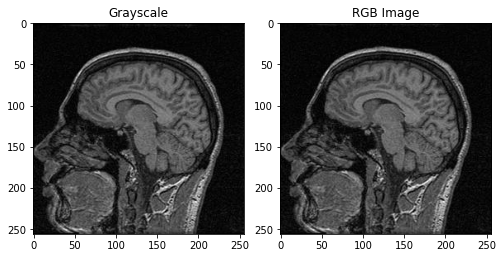

In [2]:
#Task 2.1

#Display Gray and RGB Images
imgGray = cv2.imread("images/01.jpg",0)
imgRGB  = cv2.imread("images/01.jpg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/02.jpg",0)
imgRGB  = cv2.imread("images/02.jpg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/03.png",0)
imgRGB  = cv2.imread("images/03.png",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/04.jpg",0)
imgRGB  = cv2.imread("images/04.jpg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/05.jpeg",0)
imgRGB  = cv2.imread("images/05.jpeg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/06.jpeg",0)
imgRGB  = cv2.imread("images/06.jpeg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/07.jpg",0)
imgRGB  = cv2.imread("images/07.jpg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

imgGray = cv2.imread("images/08.jpg",0)
imgRGB  = cv2.imread("images/08.jpg",1)
displayImages(imgGray,imgRGB,'Grayscale', 'RGB Image')

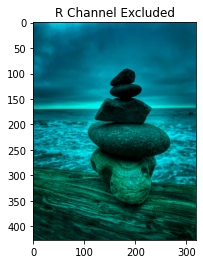

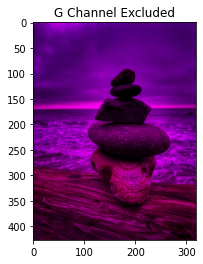

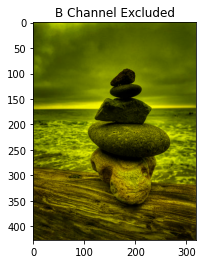

In [3]:
#Task 2.2
                                
#Remove R channel
displayImage(rgbExclusion(cv2.imread("images/01.jpg"), 'R'), 'R Channel Excluded')
#Remove G channel
displayImage(rgbExclusion(cv2.imread("images/01.jpg"), 'G'), 'G Channel Excluded')
#Remove B channel
displayImage(rgbExclusion(cv2.imread("images/01.jpg"), 'B'), 'B Channel Excluded')

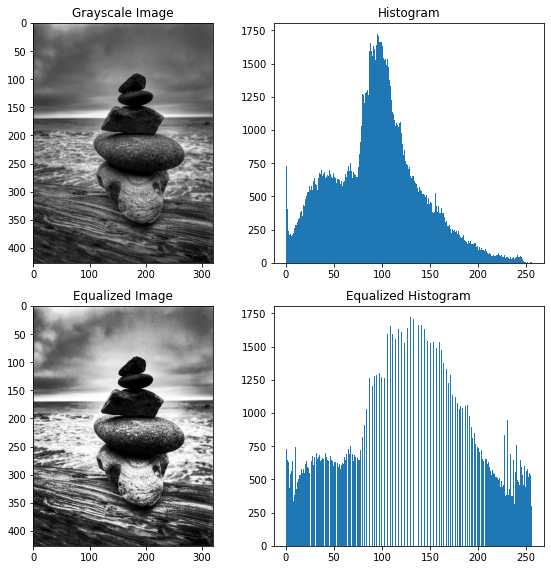

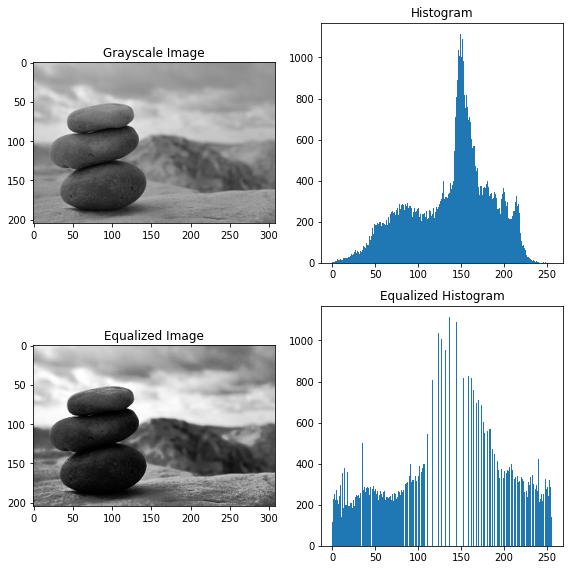

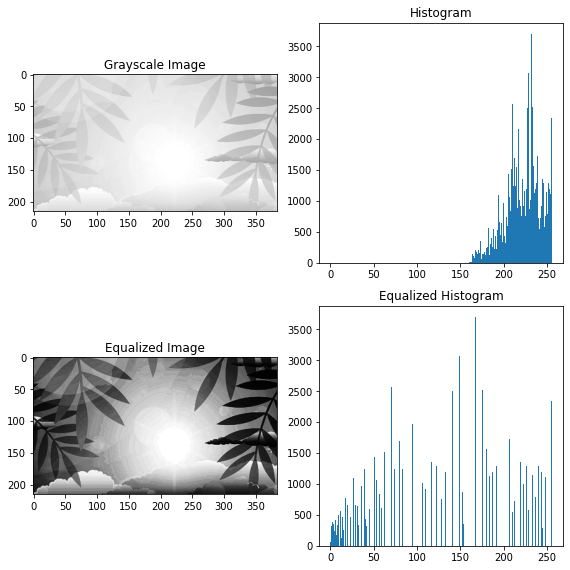

In [4]:
# Task 2.3

img01 = cv2.imread('images/01.jpg',0)
img02 = cv2.imread('images/02.jpg',0)
img03 = cv2.imread('images/03.png',0)

#Histogram Equalized Images
img01Equ = cv2.equalizeHist(cv2.imread('images/01.jpg',0))
img02Equ = cv2.equalizeHist(cv2.imread('images/02.jpg',0))
img03Equ = cv2.equalizeHist(cv2.imread('images/03.png',0))

# Histogram VS Histogram Equalization
displayHistogramEqualization(img01,img01Equ)
displayHistogramEqualization(img02,img02Equ)
displayHistogramEqualization(img03,img03Equ)

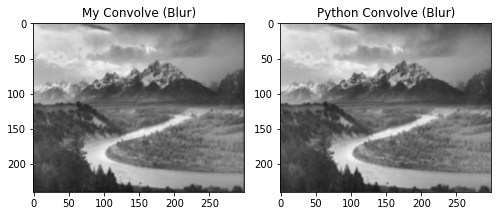

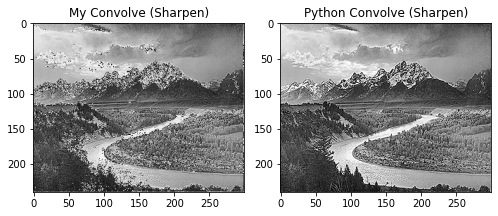

In [5]:
# Task 2.4

img = cv2.imread("images/05.jpg",0)

# Blur kernel
blur_kernel = kernel = np.ones((3,3),np.float32)/9

# Sharpen kernel
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

# My Convolve VS Python Convolve (Blur)
convolve_blur = myConvolve2d(img,blur_kernel)
python_blur = cv2.filter2D(img,-1,blur_kernel)
displayImages(convolve_blur, python_blur, 'My Convolve (Blur)', 'Python Convolve (Blur)')

# My Convolve VS Python Convolve (Sharpen)
convolve_sharpen = myConvolve2d(img,sharpen_kernel)
python_sharpen = cv2.filter2D(img, -1, sharpen_kernel)
displayImages(convolve_sharpen, python_sharpen, 'My Convolve (Sharpen)', 'Python Convolve (Sharpen)')

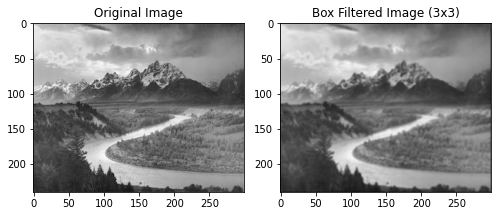

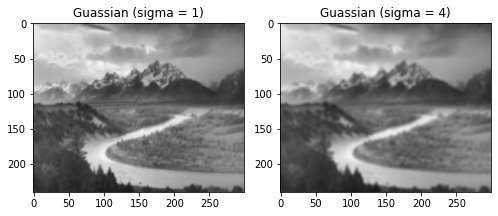

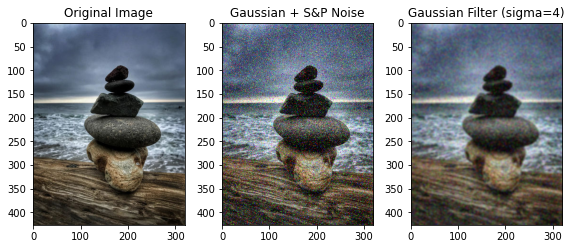

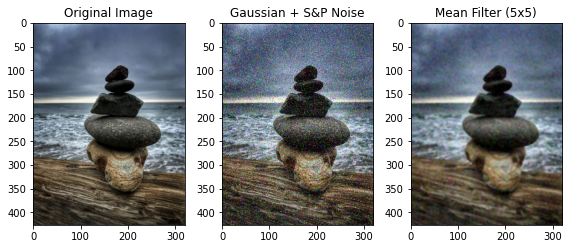

In [6]:
# Task 2.5 (Box filter, Gaussian Filter, Median Filter)

imgGray = cv2.imread("images/05.jpg",0)
img = io.imread("images/01.jpg")

#Box Filter 3x3
box_filter = kernel = np.ones((3,3),np.float32)/9
box_filter_result = myConvolve2d(imgGray,box_filter)

#Gaussian Filter (sigma = 1)
gaussian_filter_result1 = cv2.GaussianBlur(imgGray,(5,5),1)

#Gaussian Filter (sigma = 4)
gaussian_filter_result2 = cv2.GaussianBlur(imgGray,(5,5),4)

#Gaussian and Salt & Pepper Noise Addition
gaussian_noise = AddNoise(img, "gaussian")
gussian_salt_pepper_noise = AddNoise(gaussian_noise, "s&p")

#Gaussian Filter
gaussian_filter_result = cv2.GaussianBlur(gussian_salt_pepper_noise,(5,5),4)

#Median Filter
median_filter_result = cv2.medianBlur(np.array(255*gussian_salt_pepper_noise, dtype = 'uint8'), 5)

displayImages(imgGray, box_filter_result, 'Original Image', 'Box Filtered Image (3x3)')
displayImages(gaussian_filter_result1, gaussian_filter_result2, 'Guassian (sigma = 1)', 'Guassian (sigma = 4)')

displayThreeImages(img, gussian_salt_pepper_noise, gaussian_filter_result,'Original Image','Gaussian + S&P Noise','Gaussian Filter (sigma=4)')
displayThreeImages(img, gussian_salt_pepper_noise, median_filter_result,'Original Image','Gaussian + S&P Noise','Mean Filter (5x5)')

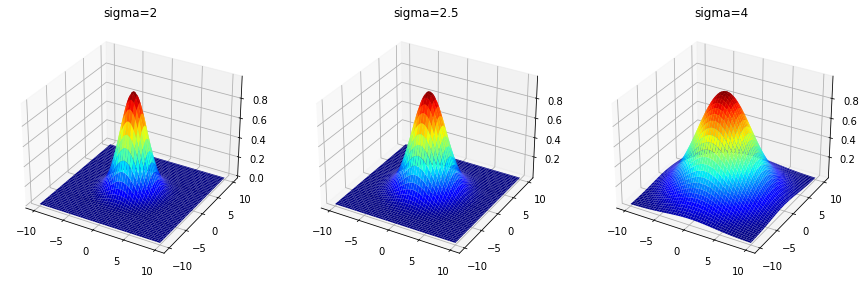

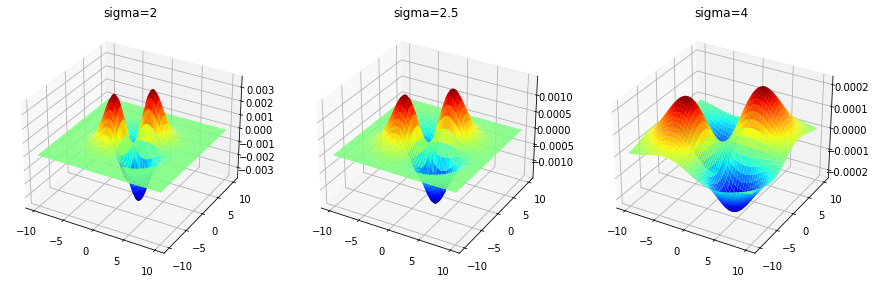

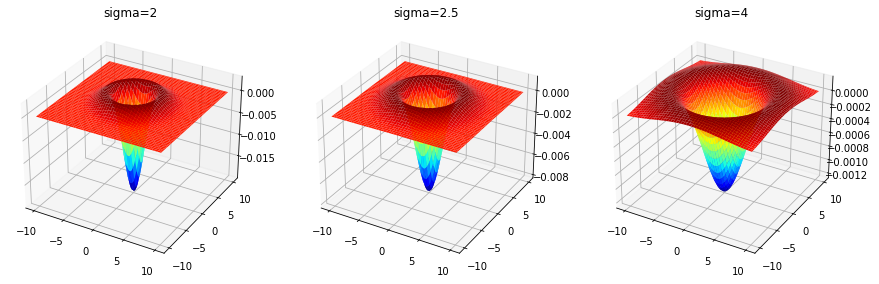

In [7]:
# Task 2.5 (Mesh Plots of Gaussian, Derivative of Gaussian, LoG)

x=np.linspace(-10,10, num=100)
y=np.linspace(-10,10, num=100)
x, y = np.meshgrid(x, y)

def gaussian(sigma):
    return np.exp(-(x**2+y**2)/(2*sigma**2))

def derivativeOfGaussian(sigma):
    return ((x*y)/(2*np.pi*sigma**6))*np.exp(-(x**2+y**2)/(2*sigma**2))

def LaplacianOfGaussian(sigma):
    return -(1/(np.pi*sigma**4))*(1-((x**2+y**2)/(2*sigma**2)))*np.exp(-((x**2+y**2)/(2*sigma**2)))

# Gaussian Mesh Plot
drawMeshPlot(x,y,gaussian(2),gaussian(2.5),gaussian(4));

# Derivative of Gaussian Mesh Plot
drawMeshPlot(x,y,derivativeOfGaussian(2),derivativeOfGaussian(2.5),derivativeOfGaussian(4));

# Laplacian of Gaussian Mesh Plot
drawMeshPlot(x,y,LaplacianOfGaussian(2),LaplacianOfGaussian(2.5),LaplacianOfGaussian(4));

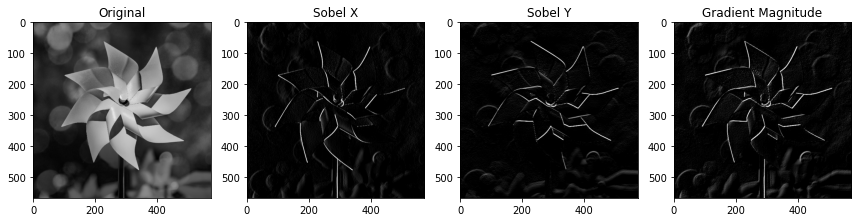

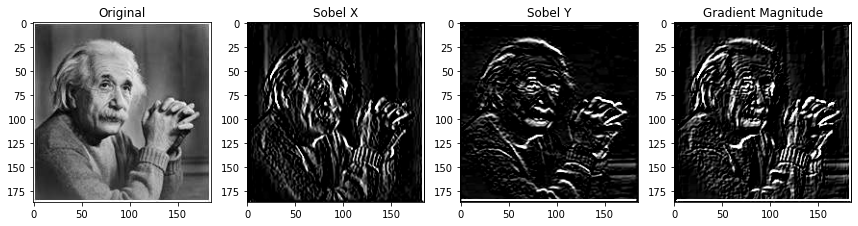

In [8]:
# Task 2.6 (Sobel Operator)

# Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")
 
# Sobel y-axis kernel
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")

# Sobel kernel
sobel = np.array(([-2, -2, 0],[-2, 0, 2],[0, 2, 2]), dtype="int")


img = cv2.imread("images/07.jpg",0)

# Apply Sobel Filter
sobelX_result = cv2.filter2D(img, -1, sobelX)
sobelY_result = cv2.filter2D(img, -1, sobelY)
sobel_result  = cv2.filter2D(img, -1, sobel)

displayFourImages(img, sobelX_result, sobelY_result, sobel_result, 'Original', 'Sobel X', 'Sobel Y', 'Gradient Magnitude')

img = cv2.imread("images/04.jpg",0)

# Apply Sobel Filter
sobelX_result = cv2.filter2D(img, -1, sobelX)
sobelY_result = cv2.filter2D(img, -1, sobelY)
sobel_result  = cv2.filter2D(img, -1, sobel)

displayFourImages(img, sobelX_result, sobelY_result, sobel_result, 'Original', 'Sobel X', 'Sobel Y', 'Gradient Magnitude')

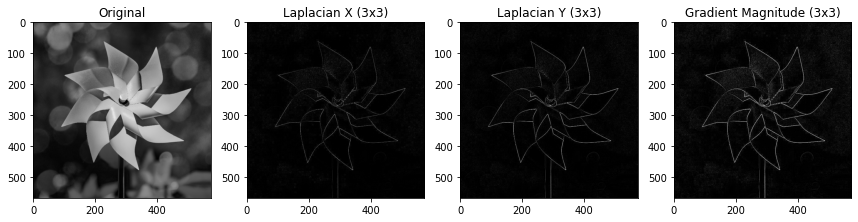

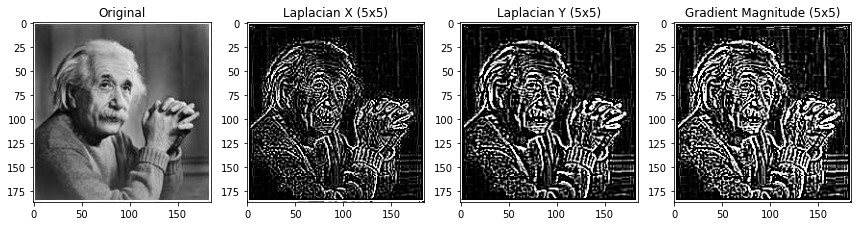

In [9]:
# Task 2.6 (Laplcian of Gaussian)

# Laplacian x-axis kernel (3x3)
laplacianX = np.array(([0, -1, 0],[-1, 4, -1],[0, -1, 0]), dtype="int")
 
# Laplacian y-axis kernel (3x3)
laplacianY = np.array(([-1, 0, -1],[0, 4, 0],[-1, 0, -1]), dtype="int")

# Laplacian kernel (3x3)
laplacian = np.array(([-1, -1, -1],[-1, 8, -1],[-1, -1, -1]), dtype="int")


img = cv2.imread("images/07.jpg",0)

# Apply Laplacian Filter
laplacianX_result = cv2.filter2D(img, -1, laplacianX)
laplacianY_result = cv2.filter2D(img, -1, laplacianY)
laplacian_result  = cv2.filter2D(img, -1, laplacian)

displayFourImages(img, laplacianX_result, laplacianY_result, laplacian_result, 'Original', 'Laplacian X (3x3)', 'Laplacian Y (3x3)', 'Gradient Magnitude (3x3)')

img = cv2.imread("images/04.jpg",0)

# Laplacian x-axis kernel (5x5)
laplacianX = np.array(([0, 0, -1, 0, 0],[0, -1, -2, -1, 0],[-1, -2, 16, -2, -1],[0, -1, -2, -1, 0],[0, 0, -1, 0, 0]), dtype="int")
 
# Laplacian y-axis kernel (5x5)
laplacianY = np.array(([-1, -1, 0, -1, -1],[-1, 0, -2, 0, -1],[0, 0, 16, 0, 0],[-1, 0, -2, 0, -1],[-1, -1, 0, -1, -1]), dtype="int")

# Laplacian kernel (5x5)
laplacian = np.array(([-1, -1, -1, -1, -1],[-1, -1, -4, -1, -1],[-1, -2, 32, -2, -1],[-1, -1, -4, -1, -1],[-1, -1, -1, -1, -1]), dtype="int")

# Apply Laplacian Filter
laplacianX_result = cv2.filter2D(img, -1, laplacianX)
laplacianY_result = cv2.filter2D(img, -1, laplacianY)
laplacian_result  = cv2.filter2D(img, -1, laplacian)

displayFourImages(img, laplacianX_result, laplacianY_result, laplacian_result, 'Original', 'Laplacian X (5x5)', 'Laplacian Y (5x5)', 'Gradient Magnitude (5x5)')

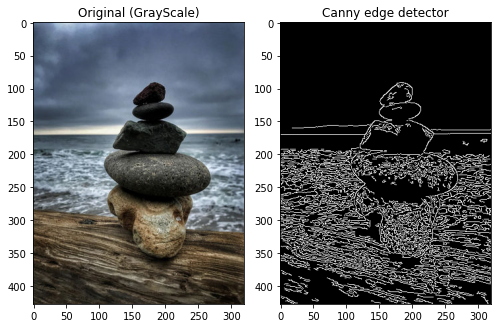

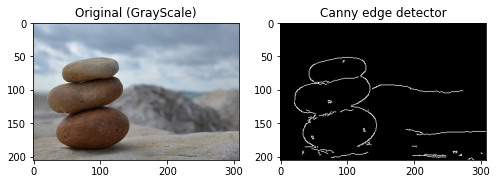

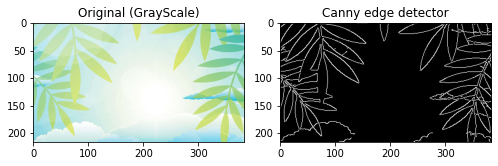

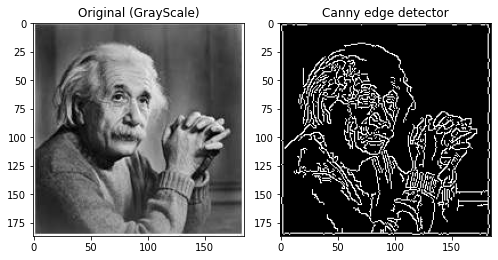

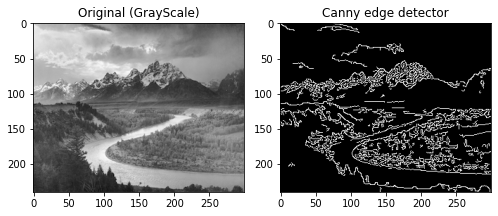

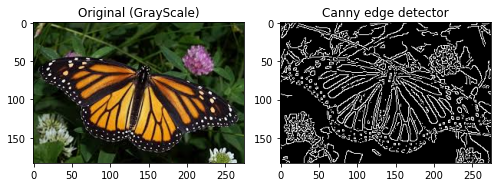

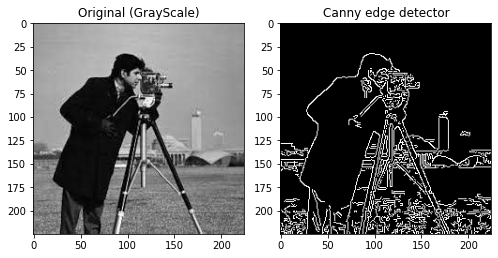

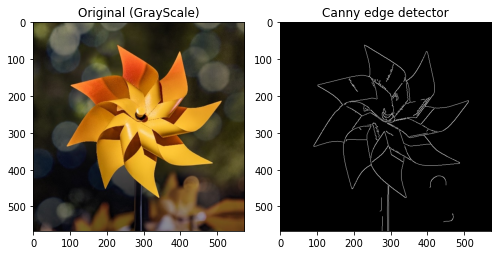

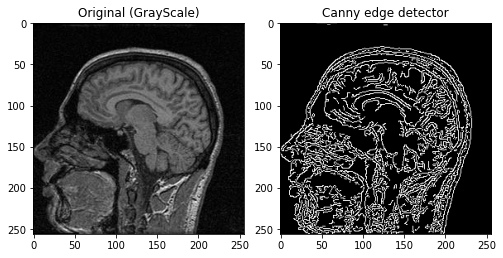

In [10]:
# Task 2.6 (Canny Edge Detector)

img = cv2.imread("images/01.jpg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/02.jpg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/03.png",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/04.jpg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/05.jpg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/05.jpeg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/06.jpeg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/07.jpg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')

img = cv2.imread("images/08.jpg",1)
edges = cv2.Canny(img, 100, 200)
displayImages(img, edges, 'Original (GrayScale)', 'Canny edge detector')


In [ ]:
# Task 2.7 (Canny Edge Detector on Real time video stream)

import cv2
import numpy as np
    
cap = cv2.VideoCapture('video/small_glass_stop_motion.mp4')  
  
while(1): 
    # reads frames from a file 
    ret, frame = cap.read() 
  
    # converting BGR to HSV 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
      
    # define range of red color in HSV 
    lower_red = np.array([30,150,50]) 
    upper_red = np.array([255,255,180]) 
      
    # create a red HSV colour boundary and threshold HSV image 
    mask = cv2.inRange(hsv, lower_red, upper_red) 
  
    # Bitwise-AND mask and original image 
    res = cv2.bitwise_and(frame,frame, mask= mask) 
  
    # Display an original image 
    cv2.imshow('Original',frame) 
  
    # finds edges in the input image image and 
    # marks them in the output map edges 
    edges = cv2.Canny(frame,100,200) 
  
    # Display edges in a frame 
    cv2.imshow('Edges',edges) 
  
    # Wait for Esc key to stop 
    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break
    
# Close the window 
cap.release() 
  
# De-allocate any associated memory usage 
cv2.destroyAllWindows()  